# Module 9 Assignment

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

In [1]:
import numpy as np
from nose.tools import assert_equal, assert_is_instance, assert_almost_equal
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import RandomState
import helper

# Problem 1: Bernoulli Success Probability Posterior Estimation

Write a function called $\texttt{binom_posterior}$ which takes as inputs a variable $\texttt{bias}$ which gives the probability a coin lands heads and $\texttt{num_flips}$ which is the number of flips to simulate. When evaluating the prior and the likelihood use the same values as in the $\texttt{intro2bs}$ notebook. Furthermore, we will also go ahead and define the binomial function from the same notebook.

In [2]:
#Set seed for reproducability
np.random.seed(0)

In [3]:
def binomial(data, n, h):
    # We can ignore the combination since it divides out in the normalization
    # Build up our probabilities
    p = [(x**h * (1 - x)**(n - h)) for x in data]
    
    # Normalize probabilities
    return (p / sum(p))

In [4]:
def binom_posterior(bias,num_flips):
    
    '''
    Inputs
    -------
    bias: the probability the biased coin in heads
    
    num_flips: the number of coin flips to simulate
    
    
    Returns
    -------
    
    posterior: the posterior distribution for the probability of landing on heads
    
    '''
    
    # YOUR CODE HERE
    x = np.arange(0.0, 1.0, 0.01)
    prior = binomial(x, 10, 5)
    likelihood = binomial(x, num_flips, num_flips * bias)
    posterior = likelihood * prior
    posterior /= np.sum(posterior)
    return posterior

In [5]:
x = np.arange(0.0, 1.0, 0.01)
posterior_mean  = sum(x*binom_posterior(.7,1000))
assert_equal(0.69762845849802357,posterior_mean)

# Problem 2: Bayesian Disease Calculation

Write a function called $\texttt{disease_calc}$ which, given $P(+|Disease)$,$P(Disease)$, and $P(+|No Disease)$ returns $P(Disease|+)$

In [6]:
def disease_calc(pd,ppd,ppnd):
    
    '''
    Inputs
    -------
    pd: the probability of having the disease
    
    ppd: the probability of getting a positive result given you have the disease
    
    ppnd: the probability of getting a positive result given you dont have the disease
    
    
    Returns
    -------
    
    posterior: the probability you have a disease given a positive test result
    
    '''
    
    # YOUR CODE HERE
    posterior = pd * ppd / (pd * ppd + (1 - pd) * ppnd)
    return posterior

In [7]:
p_pos_given_disease = disease_calc(.01,.9,.5)
assert_equal(p_pos_given_disease,0.01785714285714286)

In [8]:
from numpy.random import RandomState
import numpy as np
from nose.tools import assert_equal

# Problem 3: Create a Discrete Markov Distribution

We have a 2 State Markov Chain: Cancer and No Cancer for 50 trials. Define the state transition probabilities  as:
```
 .90 .10
 .05 .95 
```
this corresponds to
```
CC CN
NC NN
```
where C is Cancer and N is No Cancer.
and the first state should be [0 1]. Save the states to a variable called state.


In [9]:
# YOUR CODE HERE
num_trials = 50
cstate = [0, 1] # current state
stp = [[0.90, 0.10], 
       [0.05, 0.95]]
stp_array = np.array(stp)
state = np.zeros((num_trials, 2))
state[0] = np.array(cstate)
for idx in range(1, num_trials):
    # Transition to next state
    state[idx] = state[idx - 1].dot(stp_array)

In [10]:
_sol = [[0.0, 1.0], [0.05, 0.95], [0.0925, 0.9074999999999999], [0.128625, 0.8713749999999998], [0.15933124999999998, 0.8406687499999997], [0.18543156249999998, 0.8145684374999997], [0.20761682812499996, 0.7923831718749997], [0.22647430390624995, 0.7735256960937497], [0.24250315832031244, 0.7574968416796871], [0.25612768457226553, 0.743872315427734], [0.2677085318864257, 0.7322914681135738], [0.2775522521034618, 0.7224477478965377], [0.2859194142879425, 0.7140805857120569], [0.2930315021447511, 0.7069684978552483], [0.2990767768230384, 0.700923223176961], [0.3042152602995826, 0.6957847397004168], [0.30858297125464523, 0.6914170287453542], [0.31229552556644846, 0.687704474433551], [0.3154511967314812, 0.6845488032685183], [0.31813351722175903, 0.6818664827782405], [0.32041348963849514, 0.6795865103615043], [0.3223514661927208, 0.6776485338072786], [0.3239987462638127, 0.6760012537361868], [0.3253989343242408, 0.6746010656757587], [0.3265890941756046, 0.6734109058243949], [0.32760073004926393, 0.6723992699507356], [0.3284606205418743, 0.6715393794581253], [0.3291915274605931, 0.6708084725394063], [0.3298127983415041, 0.6701872016584953], [0.3303408785902785, 0.669659121409721], [0.33078974680173673, 0.6692102531982628], [0.33117128478147617, 0.6688287152185233], [0.3314955920642547, 0.6685044079357447], [0.3317712532546165, 0.6682287467453829], [0.332005565266424, 0.6679944347335753], [0.3322047304764604, 0.667795269523539], [0.3323740209049913, 0.667625979095008], [0.33251791776924255, 0.6674820822307567], [0.3326402301038562, 0.6673597698961431], [0.3327441955882777, 0.6672558044117215], [0.33283256625003604, 0.6671674337499631], [0.3329076813125306, 0.6670923186874685], [0.33297152911565103, 0.6670284708843481], [0.3330257997483033, 0.6669742002516958], [0.33307192978605776, 0.6669280702139414], [0.33311114031814903, 0.6668888596818501], [0.3331444692704266, 0.6668555307295725], [0.33317279887986256, 0.6668272011201365], [0.33319687904788314, 0.6668031209521159], [0.3332173471907007, 0.6667826528092984]]
for ans, sol in zip(state.tolist(), _sol):
    assert_almost_equal(ans[0], sol[0], places=2)
    assert_almost_equal(ans[1], sol[1], places=2)

In [11]:
# Let's take a look at the states during the first 20 trials
print(state[0:20])

[[ 0.          1.        ]
 [ 0.05        0.95      ]
 [ 0.0925      0.9075    ]
 [ 0.128625    0.871375  ]
 [ 0.15933125  0.84066875]
 [ 0.18543156  0.81456844]
 [ 0.20761683  0.79238317]
 [ 0.2264743   0.7735257 ]
 [ 0.24250316  0.75749684]
 [ 0.25612768  0.74387232]
 [ 0.26770853  0.73229147]
 [ 0.27755225  0.72244775]
 [ 0.28591941  0.71408059]
 [ 0.2930315   0.7069685 ]
 [ 0.29907678  0.70092322]
 [ 0.30421526  0.69578474]
 [ 0.30858297  0.69141703]
 [ 0.31229553  0.68770447]
 [ 0.3154512   0.6845488 ]
 [ 0.31813352  0.68186648]]


# Problem 4: Create a Continous Markov Distribution

Create a Continous Markov Distribution using 6000 samples and 5 chains using the Random State Module. Set the seed to be 20. The first index should be 5999 and the last index should be 0. Draw initial state(state[5999]) from standard normal distribution. Following states(state[n]) should be drawn from normal distribution with mean equals to 50% of previous state(state[n+1]), standard deviation equals to 1. Indicies 0:5 should look like this:
```
[[ 0.79352534  1.56613209 -0.84327939  0.27570066 -0.46833509]
 [ 0.35753197  1.15865014 -0.93834194 -0.01651544 -1.45133482]
 [ 0.03662266  0.13186933 -0.16851393  0.25371851  0.50757933]
 [-0.8261146   0.81980239  0.09537365 -0.08503631  2.06463159]
 [ 0.65934452  0.50782782 -0.9881284   1.12211264  2.31557286]]
```

Save the states in a variable called state.

In [12]:
# YOUR CODE HERE
rng = np.random.RandomState(20)
num_samples = 6000
num_chains = 5
state = np.zeros((num_samples, num_chains))
state[5999] = rng.normal()
index = [(6000 - x) for x in range(1,6001)]
for idx in index[1:]:
    state[idx] = rng.normal(0.5 * state[idx + 1], 1, num_chains)

In [13]:
print(state[0:5])

[[ 0.79352534  1.56613209 -0.84327939  0.27570066 -0.46833509]
 [ 0.35753197  1.15865014 -0.93834194 -0.01651544 -1.45133482]
 [ 0.03662266  0.13186933 -0.16851393  0.25371851  0.50757933]
 [-0.8261146   0.81980239  0.09537365 -0.08503631  2.06463159]
 [ 0.65934452  0.50782782 -0.9881284   1.12211264  2.31557286]]


# Problem 5: MCMC integration

Write a function called $\texttt{mcmc_integration}$ which takes in a number of points to randomly generate uniformly in the unit square and then estimates the value of the integral of the given function. Make sure to use the $\texttt{RandomState}$ module to generate the random data, and also pass to it a $\texttt{random_state}$ parameter for reproducibility.

In [14]:
def mcmc_integration(num_pts,function,random_state):
    
    '''
    Inputs
    -------
    num_pts: the number of points to generate
    
    functon: the name of a user made function 
    
    random_state: a parameter for reproducibility
    
    
    Returns
    -------
    
    integral: the estimated value of the integral
    
    '''
    
    # YOUR CODE HERE
    rng = RandomState(random_state)
    x, y = rng.uniform(0, 1, size=(2, num_pts))
    func_mask = y < function(x)
    ratio = float(y[func_mask].shape[0]) / num_pts
    integral = ratio
    return integral

In [15]:
#Define the function we want to integrate
def our_function(x):
    return .3*np.sin(x) + .1*np.cos(x) + .3*np.exp(-x)

In [16]:
integral_estimate = mcmc_integration(25000,our_function,random_state=20)
assert_equal(integral_estimate,0.40968)

# Problem 6: Plotting Function and Data
Create a figure and axes object. Name the Axes object ax. Create another RandomState object with the same seed to generate the random data. Plot the data using the scatter function from the axes object and plot our_function using the plot function with axes object.


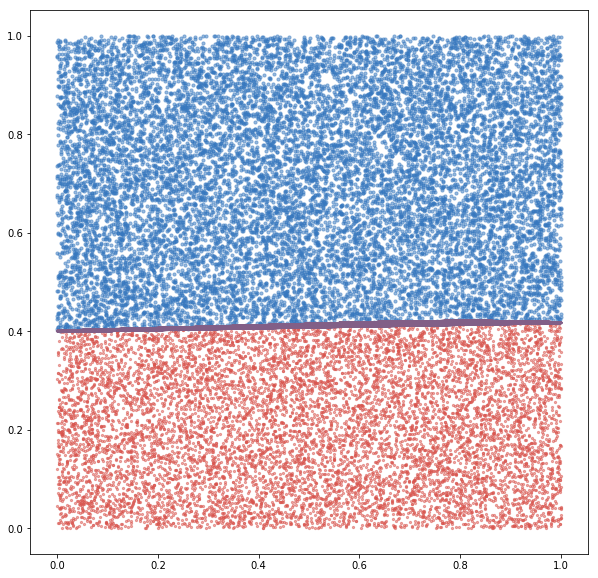

In [17]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 10))
rng = RandomState(20)
rx, ry = rng.uniform(0, 1, size=(2, 25000))
import seaborn as sns
func_mask = ry < our_function(rx)
ax.scatter(rx[func_mask], ry[func_mask], s=5, c=sns.xkcd_rgb['pale red'], alpha=0.5)
ax.scatter(rx[~func_mask], ry[~func_mask], s=10, c=sns.xkcd_rgb['windows blue'], alpha=0.5)

x_func = [item[0] for item in helper.l4_1500_line]
y_func = [our_function(item) for item in x_func]
ax.plot(x_func, y_func, linewidth=3, c=sns.xkcd_rgb['dusty purple'])

In [18]:
d0 = ax.collections[0]
d1 = ax.collections[1]

d0.set_offset_position('data')
d1.set_offset_position('data')

line = ax.lines[0]
# Checking first 1500 pts

assert_equal(d0.get_offsets().tolist()[0:1500], helper.l4_1500_0)
assert_equal(d1.get_offsets().tolist()[0:1500], helper.l4_1500_1)
for line_ans, line_sol in zip(line.get_xydata().tolist()[0:1500], helper.l4_1500_line):
    assert_almost_equal(line_ans[0], line_sol[0], places=2)
    assert_almost_equal(line_ans[1], line_sol[1], places=2)

#assert_equal(line.get_xydata().tolist()[0:1500], helper.l4_1500_line)